In [2]:
from sympy import symbols, sqrt, Matrix, simplify
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np

In [4]:
T, δ, θ, Q, η, β = symbols('T δ θ Q η β')

In [5]:
#covariance matrix

row1 = [T**2 * θ/2, 0,0,0]
row2 = [0,θ*(6-5*θ)/(1-θ)*T**2,-θ**2/(1-θ)*T**2,θ/(1-θ)*δ*T]
row3 = [0,-θ**2/(1-θ)*T**2,θ*(2-θ)/(1-θ)*T**2,-θ/(1-θ)*δ*T]
row4 = [0,θ/(1-θ)*δ*T,-θ/(1-θ)*δ*T,1/(1-θ)*δ**2]

simplifed_cov_mat = 1/Q**2 * (Matrix([row1,row2,row3,row4]))
simplifed_cov_mat
                              

Matrix([
[T**2*θ/(2*Q**2),                               0,                             0,                     0],
[              0, T**2*θ*(6 - 5*θ)/(Q**2*(1 - θ)),     -T**2*θ**2/(Q**2*(1 - θ)),  T*δ*θ/(Q**2*(1 - θ))],
[              0,       -T**2*θ**2/(Q**2*(1 - θ)), T**2*θ*(2 - θ)/(Q**2*(1 - θ)), -T*δ*θ/(Q**2*(1 - θ))],
[              0,            T*δ*θ/(Q**2*(1 - θ)),         -T*δ*θ/(Q**2*(1 - θ)),   δ**2/(Q**2*(1 - θ))]])

In [6]:
#correlaton matrix in the limit η--> 0 (lots of observing data outside of transit)
corrow1 = [1,0,0,0,0]
corrow2 = [0,1,-θ/sqrt((6-5*θ)*(2-θ)),sqrt(θ/(6-5*θ)),0]
corrow3 = [0,-θ/sqrt((6-5*θ)*(2-θ)),1,-sqrt(θ/(2-θ)),0]
corrow4 = [0,sqrt(θ/(6-5*θ)),-sqrt(θ/(2-θ)),1,0]
corrow5 = [0,0,0,0,1]
cormatlim = Matrix([corrow1,corrow2,corrow3,corrow4,corrow5])
cormatlim

Matrix([
[1,                          0,                          0,                 0, 0],
[0,                          1, -θ/sqrt((2 - θ)*(6 - 5*θ)), sqrt(θ/(6 - 5*θ)), 0],
[0, -θ/sqrt((2 - θ)*(6 - 5*θ)),                          1,  -sqrt(θ/(2 - θ)), 0],
[0,          sqrt(θ/(6 - 5*θ)),           -sqrt(θ/(2 - θ)),                 1, 0],
[0,                          0,                          0,                 0, 1]])

In [8]:
#for plotting purposes, need the correlation matrix NOT in the limit η--> 0
cor1 = [1,0,0,0,0]
cor2 = [0,1,(β-1)*θ/sqrt((6-θ*(5-β))*(2-θ*(1-β))),sqrt(((β+1)*θ)/(6-θ*(5-β))),sqrt(β*θ/(6-θ*(5-β)))]
cor3 = [0,(β-1)*θ/sqrt((6-θ*(5-β))*(2-θ*(1-β))),1,(β-1)*sqrt(θ)/sqrt((β+1)*(2-θ*(1-β))),sqrt(β*θ/(2-θ*(1-β)))]
cor4 = [0,sqrt(((β+1)*θ)/(6-θ*(5-β))),(β-1)*sqrt(θ)/sqrt((β+1)*(2-θ*(1-β))),1,sqrt(β/(β+1))]
cor5 = [0,sqrt(β*θ/(6-θ*(5-β))),sqrt(β*θ/(2-θ*(1-β))),sqrt(β/(β+1)),1]
cormat=Matrix([cor1,cor2,cor3,cor4,cor5])
cormat

Matrix([
[1,                                                 0,                                                 0,                                              0,                          0],
[0,                                                 1, θ*(β - 1)/sqrt((-θ*(1 - β) + 2)*(-θ*(5 - β) + 6)),               sqrt(θ*(β + 1)/(-θ*(5 - β) + 6)), sqrt(β*θ/(-θ*(5 - β) + 6))],
[0, θ*(β - 1)/sqrt((-θ*(1 - β) + 2)*(-θ*(5 - β) + 6)),                                                 1, sqrt(θ)*(β - 1)/sqrt((β + 1)*(-θ*(1 - β) + 2)), sqrt(β*θ/(-θ*(1 - β) + 2))],
[0,                  sqrt(θ*(β + 1)/(-θ*(5 - β) + 6)),    sqrt(θ)*(β - 1)/sqrt((β + 1)*(-θ*(1 - β) + 2)),                                              1,            sqrt(β/(β + 1))],
[0,                        sqrt(β*θ/(-θ*(5 - β) + 6)),                        sqrt(β*θ/(-θ*(1 - β) + 2)),                                sqrt(β/(β + 1)),                          1]])

In [184]:
#recreates figure 5 from Carter(2008)
#plots correlation between the parameters w/ respect to θ
#I considered using sliders for r and b θ=r/(1-b^2), but the paper just has θ ranging from 0.05 to 0.5 so I'll just use that range instead
#probably can make this function more concise with a loop somewhere (the η values), but it was simple enough just to hardcode it
def plot_corr():
    
    θ = np.linspace(0.05,0.5,500)
    
    η=0 #η will take different values (0,0.5,1)
    β = η*(1-θ)
    
    #correlation matrix
    cor1 = [1,0,0,0,0]
    cor2 = [0,1,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),np.sqrt(((β+1)*θ)/(6-θ*(5-β))),np.sqrt(β*θ/(6-θ*(5-β)))]
    cor3 = [0,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),1,(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),np.sqrt(β*θ/(2-θ*(1-β)))]
    cor4 = [0,np.sqrt(((β+1)*θ)/(6-θ*(5-β))),(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),1,np.sqrt(β/(β+1))]
    cor5 = [0,np.sqrt(β*θ/(6-θ*(5-β))),np.sqrt(β*θ/(2-θ*(1-β))),np.sqrt(β/(β+1)),1]
    cormat=[cor1,cor2,cor3,cor4,cor5]
    
    fig,ax = plt.subplots(2,3)
    fig.set_size_inches(8,5)                      
    fig.tight_layout()
    
    ax[0][0].set_xlabel('θ')
    ax[0][0].set_ylim(-1,0)
    ax[0][0].set_xscale('log')
    ax[0][0].set_xticks([0.05, 0.15, 0.5])
    ax[0][0].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[0][0].text(0.05,-0.8,'T,τ',fontsize=12)
    
    ax[0][1].set_xlabel('θ')
    ax[0][1].set_ylim(0,1)
    ax[0][1].set_xscale('log')
    ax[0][1].set_xticks([0.05, 0.15, 0.5])
    ax[0][1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[0][1].text(0.05,0.8,'τ,δ',fontsize=12)
    
    ax[0][2].set_xlabel('θ')
    ax[0][2].set_ylim(-1,0)
    ax[0][2].set_xscale('log')
    ax[0][2].set_xticks([0.05, 0.15, 0.5])
    ax[0][2].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[0][2].text(0.05,-0.8,'δ,T',fontsize=12)
    
    ax[1][0].set_xlabel('θ')
    ax[1][0].set_ylim(0,1)
    ax[1][0].set_xscale('log')
    ax[1][0].set_xticks([0.05, 0.15, 0.5])
    ax[1][0].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[1][0].text(0.05,0.8,'τ,f0',fontsize=12)
    
    ax[1][1].set_xlabel('θ')
    ax[1][1].set_ylim(0,1)
    ax[1][1].set_xscale('log')
    ax[1][1].set_xticks([0.05, 0.15, 0.5])
    ax[1][1].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[1][1].text(0.05,0.8,'T,f0',fontsize=12)
    
    ax[1][2].set_xlabel('θ')
    ax[1][2].set_ylim(0,1)
    ax[1][2].set_xscale('log')
    ax[1][2].set_xticks([0.05, 0.15, 0.5])
    ax[1][2].get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    ax[1][2].text(0.05,0.8,'δ,f0',fontsize=12)
    
    #plots with η=0
    ax[0][0].plot(θ,cormat[2][1],label='η=0') #T and τ
    ax[0][1].plot(θ,cormat[1][3]) #τ and δ
    ax[0][2].plot(θ,cormat[3][2]) #δ and T
    ax[1][0].plot(θ,cormat[1][4]) #τ and f_0
    ax[1][1].plot(θ,cormat[2][4]) #T and f_0
    ax[1][2].plot(θ,cormat[3][4]) #δ and f_0
    
    η=0.5
    β = η*(1-θ)
    cor1 = [1,0,0,0,0]
    cor2 = [0,1,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),np.sqrt(((β+1)*θ)/(6-θ*(5-β))),np.sqrt(β*θ/(6-θ*(5-β)))]
    cor3 = [0,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),1,(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),np.sqrt(β*θ/(2-θ*(1-β)))]
    cor4 = [0,np.sqrt(((β+1)*θ)/(6-θ*(5-β))),(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),1,np.sqrt(β/(β+1))]
    cor5 = [0,np.sqrt(β*θ/(6-θ*(5-β))),np.sqrt(β*θ/(2-θ*(1-β))),np.sqrt(β/(β+1)),1]
    cormat=[cor1,cor2,cor3,cor4,cor5]
    
    #plots with η=0.5
    ax[0][0].plot(θ,cormat[2][1],linestyle='--',label='η=0.5') #T and τ
    ax[0][1].plot(θ,cormat[1][3],linestyle='--') #τ and δ
    ax[0][2].plot(θ,cormat[3][2],linestyle='--') #δ and T
    ax[1][0].plot(θ,cormat[1][4],linestyle='--') #τ and f_0
    ax[1][1].plot(θ,cormat[2][4],linestyle='--') #T and f_0
    ax[1][2].plot(θ,cormat[3][4],linestyle='--') #δ and f_0
    
    η=1
    β = η*(1-θ)
    cor1 = [1,0,0,0,0]
    cor2 = [0,1,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),np.sqrt(((β+1)*θ)/(6-θ*(5-β))),np.sqrt(β*θ/(6-θ*(5-β)))]
    cor3 = [0,(β-1)*θ/np.sqrt((6-θ*(5-β))*(2-θ*(1-β))),1,(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),np.sqrt(β*θ/(2-θ*(1-β)))]
    cor4 = [0,np.sqrt(((β+1)*θ)/(6-θ*(5-β))),(β-1)*np.sqrt(θ)/np.sqrt((β+1)*(2-θ*(1-β))),1,np.sqrt(β/(β+1))]
    cor5 = [0,np.sqrt(β*θ/(6-θ*(5-β))),np.sqrt(β*θ/(2-θ*(1-β))),np.sqrt(β/(β+1)),1]
    cormat=[cor1,cor2,cor3,cor4,cor5]
    
    #plots with η=1
    ax[0][0].plot(θ,cormat[2][1],linestyle=':',label='η=1') #T and τ
    ax[0][1].plot(θ,cormat[1][3],linestyle=':') #τ and δ
    ax[0][2].plot(θ,cormat[3][2],linestyle=':') #δ and T
    ax[1][0].plot(θ,cormat[1][4],linestyle=':') #τ and f_0
    ax[1][1].plot(θ,cormat[2][4],linestyle=':') #T and f_0
    ax[1][2].plot(θ,cormat[3][4],linestyle=':') #δ and f_0
    
    fig.legend(loc='lower right')

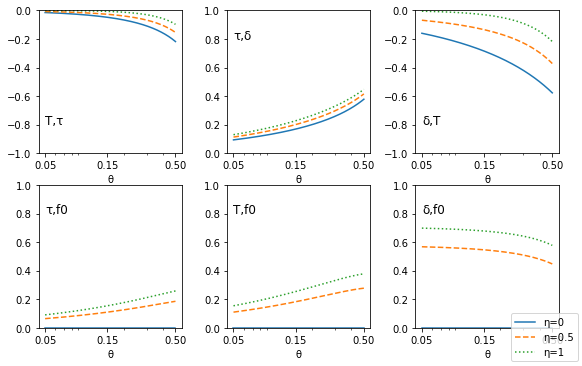

In [185]:
plot_corr();

In [5]:
def cov_derivatives(t_c,T,tau,delta,t):
    t_c_deriv = -delta*(t-t_c)/(tau*np.abs(t-t_c))
    tau_deriv = -delta*(np.abs(t-t_c)-T/2)/tau**2
    T_deriv = -delta/(2*tau)
    del_deriv = (np.abs(t-t_c)-T/2)/tau-0.5
    f_0_deriv = 0
    
    deriv_dict = {
        "t_c": [0,t_c_deriv,0],
        "tau": [0,tau_deriv,0],
        "T": [0,T_deriv,0],
        "delta":[-1,del_deriv,0],
        "f_0": [1,1,1]
    }
    
    return deriv_dict

In [7]:
cov_derivatives(5,10,2,0.9,10)

{'t_c': [0, -0.45, 0],
 'tau': [0, -0.0, 0],
 'T': [0, -0.225, 0],
 'delta': [-1, -0.5, 0],
 'f_0': [1, 1, 1]}